In [2]:
!nvidia-smi

Sun Nov 12 08:28:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.94       Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:02:00.0 Off |                  N/A |
| N/A   55C    P0    N/A /  N/A |      0MiB /  2048MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Task 1: Creating a neural network

## Abstract 
In this notebook, we have created a simple neural network where we have trained MNIST dataset on simplest possible model. To ensure the efficacy and reliability of the model, we have performed rudemantary hyperparamer tuning and basic sanity check of our proposed model. As a evaluation matrics, we have used F1 Score and accuracy score. Sometime accuracy score might be misleading that is why we have also reported F1 Score.
 
## 🛠 Tools used

Here, Keras, Scikit-learn, Scikit-learn Image, Tensoflow, Matplotlib, Seaborn are used to build the whole model.

- Visual Studio Code is used as an IDE.
- For visualization of the plots, Matplotlib and Seaborn are used.

### Necessary Imports 

In [3]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
import seaborn as sns
import skimage.io as io
import numpy as np
import time
import random

### Ploting Function

In [4]:
# Copied Code
def plt_dynamic(x, vy, ty, ax):
    ax.plot(x, vy,'b', label='Validation Loss')
    ax.plot(x, ty, 'r', label='Train Loss')
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [5]:
def plt_img(img, label):
    io.imshow(img)
    plt.title(f'This is an image of digit {label}')
    # plt.show()

## Understanding Dataset and Spliting

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, random_state=42, test_size=0.3)

In [7]:
print(f"Train Example Count: {X_train.shape[0]}")
print(f"Validation Example Count: {X_valid.shape[0]}")
print(f"Test Example Count: {X_test.shape[0]}")
print(f"Image Size: {X_train.shape[1]} X {X_train.shape[2]}")

Train Example Count: 60000
Validation Example Count: 7000
Test Example Count: 3000
Image Size: 28 X 28


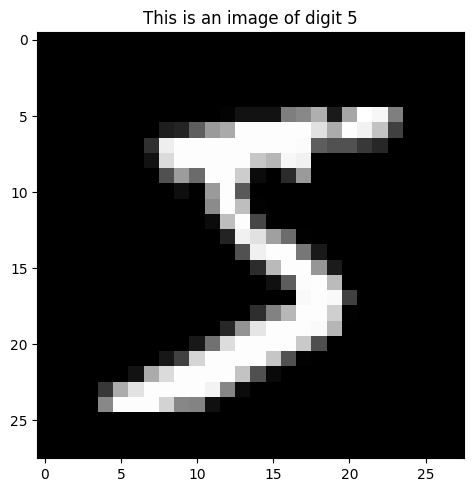

In [8]:
plt_img(X_train[0], y_train[0])

### Normalizing the image

In [9]:
X_train=X_train/255.
X_test=X_test/255.
X_valid=X_valid/255.

## Preprocessing


### Class label distribution of Train Set

In [10]:
unique, counts = np.unique(y_train, return_counts=True)
print("Relative Frequency of y_train(in percentage)")
print(np.asarray((unique, 100*(counts/y_train.shape[0]))).T)

Relative Frequency of y_train(in percentage)
[[ 0.          9.87166667]
 [ 1.         11.23666667]
 [ 2.          9.93      ]
 [ 3.         10.21833333]
 [ 4.          9.73666667]
 [ 5.          9.035     ]
 [ 6.          9.86333333]
 [ 7.         10.44166667]
 [ 8.          9.75166667]
 [ 9.          9.915     ]]


It is understandable that the training dataset is quite balanced and it follows *uniform* distribution. It a fairly good dataset to work with. This dataset is consists of 10 classes. 

#### Reshaping the input data owing to make it digestable to model and imposing one-hot-encoding to labels of the dataset

In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
y_train =  np_utils.to_categorical(y_train, 10)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
y_test = np_utils.to_categorical(y_test, 10)

X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1]*X_valid.shape[2])
y_valid = np_utils.to_categorical(y_valid, 10)

## Model Selection

From our hyperparameter turing notebook, we have come to know that parameter for the best model is consist of {'layer1Unit': 512, 'layer2Unit': 128, 'loss_fnction': 'categorical_crossentropy', 'optimizer': 'adam'}. As this is fairly simple tasks, we have strict our layer count limited to three (2 layers, 1 output softmax layer).


In [12]:
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 2048
EPOCH = 20

In [13]:
def proposed_model(optim='adam', loss_fnc='categorical_crossentropy', layer1Unit = 512, layer2Unit=128):
    model = Sequential()
    model.add(Dense(layer1Unit, activation='relu', input_shape=(input_dim,)))
    model.add(Dense(layer2Unit, activation='relu'))
    model.add(Dense(output_dim, activation='softmax'))
    
    model.compile(optimizer=optim, loss=loss_fnc, metrics=['accuracy'])
    return model

#### Basic Model Archicture

In [14]:
model = proposed_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


### Training

In [15]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=EPOCH, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.7425 - accuracy: 0.8048 - val_loss: 0.2813 - val_accuracy: 0.9186
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2445 - accuracy: 0.9287 - val_loss: 0.1959 - val_accuracy: 0.9426
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1764 - accuracy: 0.9495 - val_loss: 0.1582 - val_accuracy: 0.9539
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1410 - accuracy: 0.9596 - val_loss: 0.1305 - val_accuracy: 0.9589
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1136 - accuracy: 0.9686 - val_loss: 0.1126 - val_accuracy: 0.9641
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0947 - accuracy: 0.9729 - val_loss: 0.1006 - val_accuracy: 0.9701
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0791 - accuracy: 0.9777 - val_loss: 0.0900 - val_accuracy: 0.9724
Epoch 8/20
30

## Loss-Epoch Graph

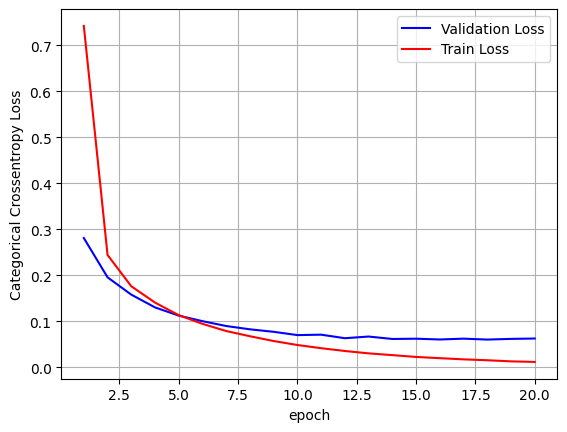

In [16]:
x = list(range(1,EPOCH+1))

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred = np.argmax(y_pred, axis=-1)
y_test = np.argmax(y_test, axis=-1)

### Classification Report

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       290
           1       1.00      0.99      1.00       346
           2       0.97      0.97      0.97       315
           3       0.99      0.99      0.99       304
           4       0.97      0.97      0.97       315
           5       0.98      0.99      0.98       249
           6       0.99      0.96      0.97       291
           7       0.98      0.98      0.98       298
           8       0.97      0.95      0.96       286
           9       0.96      0.97      0.97       306

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



From this report, it is easily understable that the f1 score is around 98% percent in test set which is relatively high. We can say that our model can distinguish digits. To check more we can try simple random check on test set.

<Figure size 640x480 with 0 Axes>

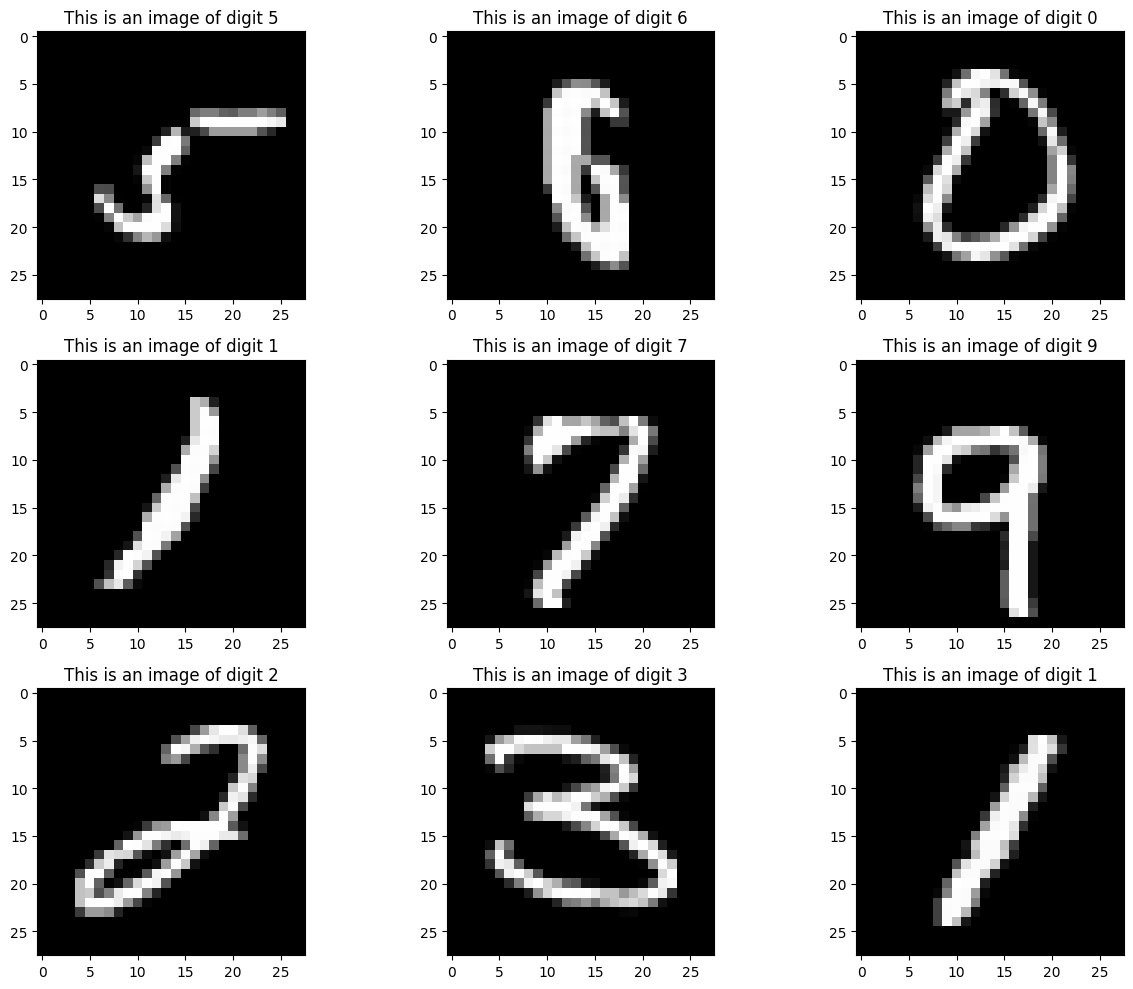

In [20]:
fig = plt.figure()
plt.figure(figsize=(15,10))
for i in range(1, 10):
    ran = random.randint(0, y_test.shape[0])
    plt.subplot(3,3,i)
    plt_img(X_test[ran].reshape(28, 28), y_test[ran])
plt.show()

We can observe that our model is working quite well.

## Sanity Check

<Figure size 640x480 with 0 Axes>

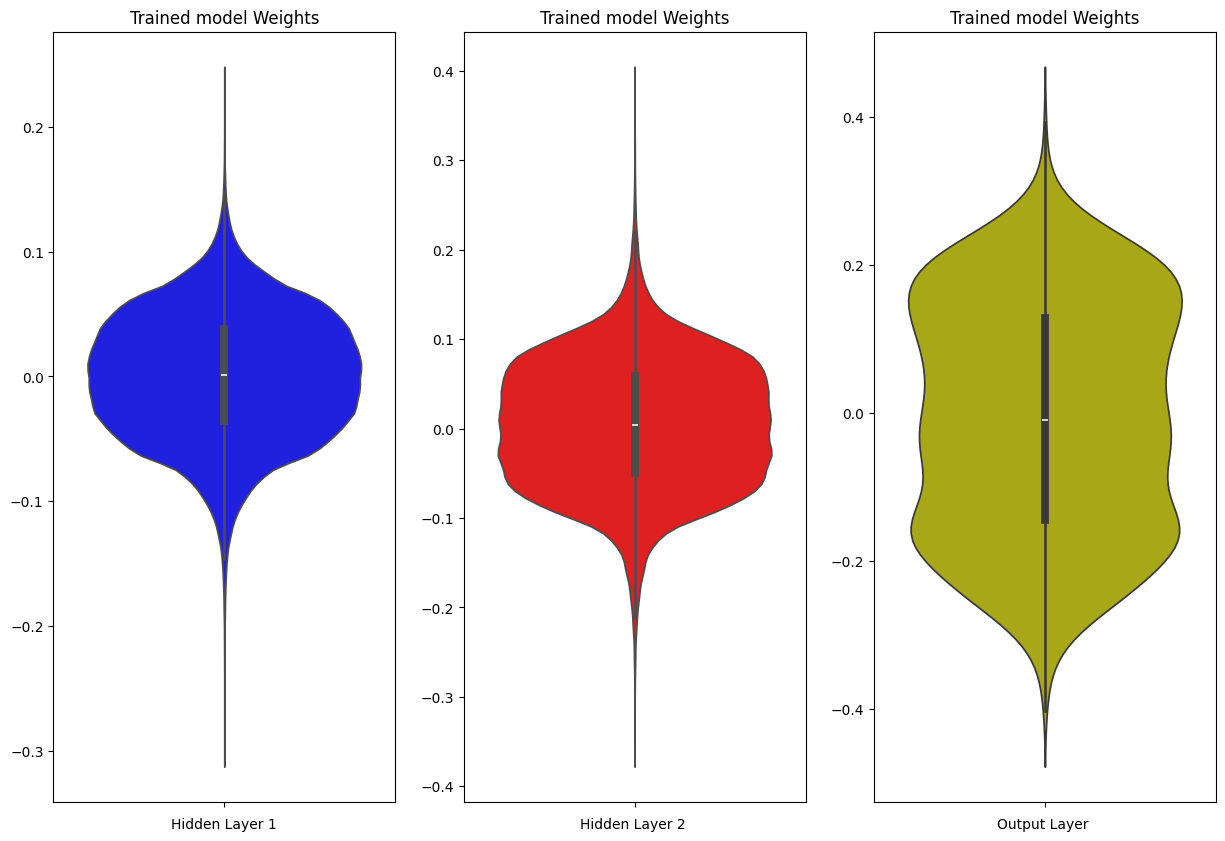

In [21]:
h1_w = model.layers[0].get_weights()[0].flatten()
h2_w = model.layers[1].get_weights()[0].flatten()
out_w = model.layers[2].get_weights()[0].flatten()


fig = plt.figure()
plt.figure(figsize=(15,10))
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

This plot shows that in each layer the weights are quite balanced like *normal* distribution. None of the values are extreme. From this, we can extrapolate that this model is quite balanced. 